# Cálculo de intervalo de confiança de acordo com o artigo "On the accuracy of simulated percentage points" (Juritz et al).

Nomenclatura usada no artigo:

- $f(x)$: pdf de uma variável aleatória $X$;
- $0 < p < 1$, ${\xi}_p$ denota o (100$p$) percentil de $X$;


## Estimativa do percentil e intervalo de confiança

Toda a discussão nessa seção é um resumo/tradução dos dados do artigo.

### The single-sample method

Nesse modelo o percentil é estimado a partir de uma única simulação de tamanho $n$.

Seja $X_{(i)}$ a $i$'ésima menor observação da simulação. De acordo com o artigo, David (1970) mostrou que para qualquer variável aleatória contínua o irtevalo $(X_{(r)}, X_{(s)})$, com $r < s$, abarca ${\xi}_p$ com probabilidade $ \pi(r, s, n, p) $. Essa probabilidade é dada por:


<center>$Prob(X_{(r)} \lt \xi_p \lt X_{(s)}) = \pi(r, s, n, p) = \sum_{i = 1}^{s - 1} \binom{n}{p} p^i (1 - p)^{(n-i)}$</center>


Note que o que está sendo feito aqui é:

1. fazemos uma simulação de Monte Carlo e o resultado são amostras da variável aleatória $X$; São realizadas $n$ simulações.

2. ordenamos o resultado do maior para o menor e chamamos de $X_{(i)}$ onde $ 1 <= i <= n $ é o índice dos resultados já ordenados;

3. estimamos o valor do (100$p$) percentil de $X$: ${\xi}_p \sim X_{(k)}$, onde $k = floor(np + 1)$.

4. calculamos dois índices, $r$ e $s$. Esses índices, quando aplicados em $X_{(i)}$, dão o intervalo de confiança para a nossa estimativa do percentil com probabilidade $\pi(r,s,n,p)$

$p$ é o percentil (ou quantil) que estamos interessados. Assim, $p = Prob(X \le \xi_p)$. $r$ e $s$ são **escolhidos** de tal forma que o intervalo tenha confiança de $ 1 - \alpha$, ou seja, $\pi(r,s,n,p) = 1 - \alpha$.

Considerando $n$ como um valor muito grande, $\pi(r,s,n,p)$ pode ser calculado aproximando a distribuação binomial por uma normal. Com isso, $r$ e $s$ pode ser encontrado como:

<center>
    $r = -w z_\gamma + np + \frac{1}{2}$ e $s = +w z_\gamma + np + \frac{1}{2}$
</center>

onde $w = \sqrt{np(1-p)}$ e $z_\gamma$ se refere ao (100$\gamma$) percentil da distribuição normal padrão. Por fim, $\gamma = 1 - \frac{\alpha}{2}$.

<span style="color:red">OBSERVAÇÃO: Essa aproximação é válida quando $np > 5$ e $nq > 5$ (onde $q = 1 - p$) [Referência](https://stats.libretexts.org/Courses/Las_Positas_College/Math_40%3A_Statistics_and_Probability/06%3A_Continuous_Random_Variables_and_the_Normal_Distribution/6.04%3A_Normal_Approximation_to_the_Binomial_Distribution). Como exemplo, se estamos trabalhando com o quantil 999, $ p = 0.999$ e $q = 0.001$, então $n$ deve ser no mínimo 5000.</span>


## Simulação com gausiana

Para testar, vamos considerar o cálculo do percentil 95 de uma distribuição normal. Ou seja, estamos interessados no cálculo de $\xi_{0.95}$. O valor real é de 1.6449. Vamos calcular o mesmo valor usando uma série de simulações diferentes valores de $n$ (número de amostras) e estimar o valor de $\xi_{0.95}$. Além disso, vamos fornecer um intervalo de confiança pra estimativa.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Percentis desejados
p = np.array([0.95, 0.975])

# Quantidade de simulações
n = np.array([100, 400, 500, 1000, 5000, 10000, 100000])

# Seta a seed para 42 e gera uma amostra grande
np.random.seed(42)
amostras = np.random.normal(size=np.max(n))

def juritz_et_al(amostras, n, p):
    # Ordena do menor pro maior
    x = np.sort(amostras)
    # Índice da estimativa do percentil
    k = int(np.floor(p*n + 1))
    # Percentil na amostra
    m_k = x[k - 1]
    # Cálculo de w e z_gamma, necessários para o cálculo de r e s
    w = (n * p * (1 - p)) ** 0.5
    z_gamma = scipy.stats.norm.ppf(p)
        
    # Cálculo dos índices r e s (intervalos de confiança)
    r = int(np.ceil( -w * z_gamma + n * p + 0.5))
    s = int(np.ceil( +w * z_gamma + n * p + 0.5))
    # Cálcula intervalo de confiança
    m_r = x[r-1] if r <= n else float('NaN')
    m_s = x[s-1] if s <= n else float('NaN')
    ci_length = (x[s-1] - x[r-1]) if r <= n and s <= n else float('NaN')
    return k, m_k, r, m_r, s, m_s, ci_length
    
# Cálcula cada percentil para cada p e n e mostra os resultados
# em uma tabela. Informa também o intervalo de confiança calculado
# Essa tabela é uma tentativa de reproduzir os dados do artigo
print('Percentil estimado está na coluna m_k.')
print('As colunas m_r e m_s representam a estimativa para os limites do intervalo de confiança.')
for p_i in p:
    print('----------------------------------------------------------')
    print(f'p = {p_i}. Valor real: {scipy.stats.norm.ppf(p_i)}')
    print('n\tk\tm_k\tr\tm_r\ts\tm_s\tCI Length')
    for n_i in n:
        k, m_k, r, m_r, s, m_s, ci_length = juritz_et_al(amostras[0:n_i], n_i, p_i)
        print(f'{n_i}\t{k}\t{m_k:0.4f}\t{r}\t{m_r:.4f}\t{s}\t{m_s:.4f}\t{ci_length}')
        
        
#estimativa_percentil = amostras_ordenadas[k]

Percentil estimado está na coluna m_k.
As colunas m_r e m_s representam a estimativa para os limites do intervalo de confiança.
----------------------------------------------------------
p = 0.95. Valor real: 1.6448536269514722
n	k	m_k	r	m_r	s	m_s	CI Length
100	96	1.5230	92	1.0571	100	1.8523	0.7951559582900221
400	381	1.5860	374	1.4779	388	1.8862	0.4082918564690141
500	476	1.6324	468	1.5327	484	1.8762	0.34343192621330854
1000	951	1.6871	940	1.5775	962	1.8124	0.23499527823345434
5000	4751	1.6406	4726	1.6088	4776	1.6787	0.06989381763819269
10000	9501	1.6434	9465	1.6148	9537	1.6743	0.059491975361278815
100000	95001	1.6506	94888	1.6393	95114	1.6617	0.022407504724111682
----------------------------------------------------------
p = 0.975. Valor real: 1.959963984540054
n	k	m_k	r	m_r	s	m_s	CI Length
100	98	1.5646	95	1.4779	102	nan	nan
400	391	2.1222	385	1.8523	397	2.3147	0.4623803821645709
500	488	2.0607	482	1.8523	495	2.1905	0.33817744130104077
1000	976	1.9647	966	1.8490	986	2.1898	0.3408468

## Simulação com dados do SHARC

Para esse exemplo vamos considerar os mesmos dados que no caso do caderno 1.:

In [7]:
# Função auxiliar para plotar intervalo de confiança
def plot_parametro_com_intervalo_confianca(label, valor_real, parametro_calculado, intervalo_confianca_inf, intervalo_confianca_sup, ymin=None, ymax=None):
    plt.plot(qtd_amostras_analisadas, parametro_calculado)
    plt.plot(qtd_amostras_analisadas, intervalo_confianca_inf, 'b')
    plt.plot(qtd_amostras_analisadas, intervalo_confianca_sup, 'b')
    plt.plot(qtd_amostras_analisadas, valor_real*np.ones(len(qtd_amostras_analisadas)))
    plt.title(label)
    if ymin is not None and ymax is not None:
        xmin, xmax, _, _ = plt.axis()
        plt.axis([xmin, xmax, ymin, ymax])
    plt.show()

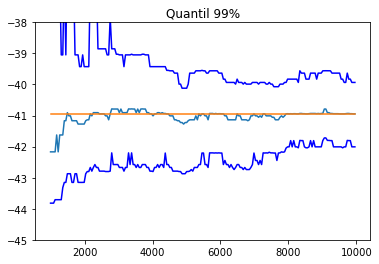

In [8]:
arquivo_resultado = 'resultados/sem ssl/DL_20126808km2_nadir_50/sharc/output/[SYS] INR samples.txt'
#arquivo_resultado = 'INR.txt'
all_data = np.loadtxt(arquivo_resultado, dtype='float', usecols=(1), delimiter="\t", comments="#")

qtd_inicial_amostras = 1000
total_amostras = len(all_data)
total_simulacoes = 200
passo = int((total_amostras - qtd_inicial_amostras)/total_simulacoes)
qtd_amostras_analisadas = range(qtd_inicial_amostras, total_amostras, passo)

# Guarda a estimativa e o intervalo de confiança do quantil 99%
m_k_099 = list()
m_r_099 = list()
m_s_099 = list()

# Guarda a estimativa e o intervalo de confiança do quantil 99.9%
m_k_0999 = list()
m_r_0999 = list()
m_s_0999 = list()

#print('n\tk\tm_k\tr\tm_r\ts\tm_s\tCI Length')
for n_amostras in qtd_amostras_analisadas:
    k, m_k, r, m_r, s, m_s, ci_length = juritz_et_al(all_data[0:n_amostras], n_amostras, 0.99)
    m_k_099.append(m_k)
    m_r_099.append(m_r)
    m_s_099.append(m_s)

    k, m_k, r, m_r, s, m_s, ci_length = juritz_et_al(all_data[0:n_amostras], n_amostras, 0.999)
    #print(f'{n_amostras}\t{k}\t{m_k:0.4f}\t{r}\t{m_r:.4f}\t{s}\t{m_s:.4f}\t{ci_length}')
    m_k_0999.append(m_k)
    m_r_0999.append(m_r)
    m_s_0999.append(m_s)

plot_parametro_com_intervalo_confianca('Quantil 99%', np.percentile(all_data, 99), m_k_099, m_r_099, m_s_099, -45, -38)
if total_amostras > 10500:
    plot_parametro_com_intervalo_confianca('Quantil 99.9%', np.percentile(all_data, 99.9), m_k_0999, m_r_0999, m_s_0999)